In [1]:
# import das bibliotecas necessarias:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
# bibliotecas para pintar prismas!
from matplotlib.path import Path
from matplotlib.patches import PathPatch


In [2]:
# path referente aa localizacao do modulo:
sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
#sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Import da biblioteca externa:
from plots import plots_rectangles

## Tarefa : 
> Plotar prismas de acordo com os dados fornecidos que são o número de observações e as dimensões referentes aos prismas. Neste caso, estamos considerando prismas de mesmas dimensões. Posteriormente, iremos diferenciar os prismas entre si.

In [4]:
# Coletando os limites em x e z do levantamento sintético:
nobs = 10 # número de observações
zmin = 0.0 # limite mínimo em z do levantamento sintético
zmax = 10.0 # limite máximo em z do levantamento sintético
xmin = 0.0 # limite mínimo em x do levantamento sintético
xmax = 100.0 # limite máximo em x do levantamento sintético

In [5]:
# definindo as coordenadas sinteticas do levantamento:
x = np.linspace(xmin, xmax, nobs, endpoint=True)
#z = np.linspace(zmin, zmin, nobs, endpoint=True)
z = np.zeros( len(x) )
for i in range( len(x) ):
    z[i] = random.uniform(0.0, -10.0)  

print(x[0]-x[1])

-11.11111111111111


In [6]:
# localizacao do primeiro prisma em funcao da posicao de observacao (1 prisma por observacao):
xmed = ( x[0] + x[1] ) / 2.0
x_prisma = x[0] - ( xmed )

print (x_prisma)

-5.555555555555555


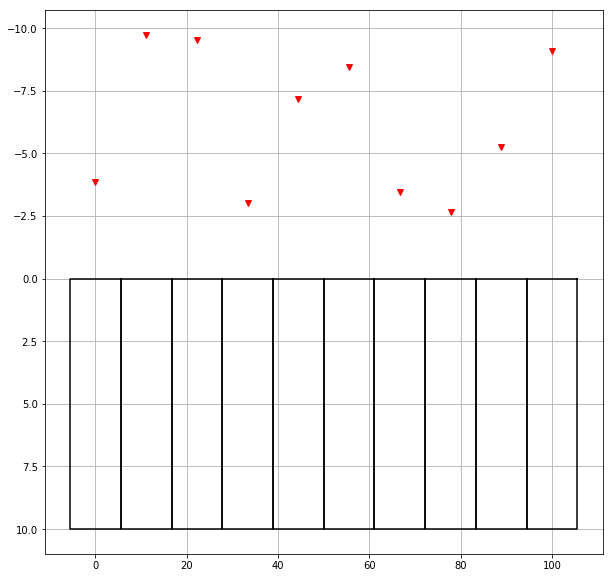

In [7]:
# Visualização gráfica:
plt.figure( figsize=(10,10) )
plt.plot(x,z,'vr')

for i in range (nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
#plt.ylim(zmin, zmax + 10)
plt.gca().invert_yaxis()
plt.show()

## Teste da funcao plots_rectangles:


In [ ]:
# definicao das profundidades de cada prisma (a posteriori, sera o resultado obtido)
p = np.linspace(2.0, 20.0, len(x), endpoint=True )
print( p )

In [ ]:
# definindo os valores de constraste de densidade
cden = np.zeros( len(x) )
for i in range( len(x) ):
    cden[i] = random.uniform(0.0, 30.0) 
print( cden )

In [ ]:
plots_rectangles(x, z, p, cden, color='black')

# TODO:<br>
> ajustar o negocio ai (grafico) para observacoes que simulam um relevo (zo variavel) (OK) <br> 
> preencher cada retangulo com cores, onde cada cor representa um contraste de densidade (tentar desenvolver melhor) ($g/cm^3$)

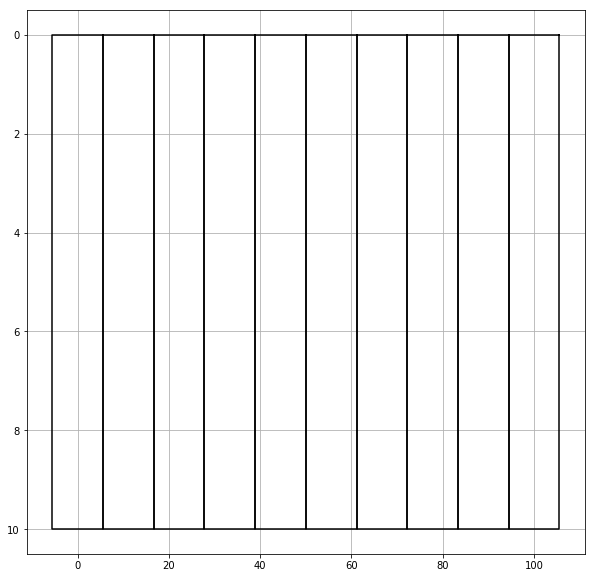

In [8]:
# Visualização gráfica:
plt.figure( figsize=(10,10) )

for i in range(nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
#plt.ylim(zmin, zmax + 10)
plt.gca().invert_yaxis()
plt.show()

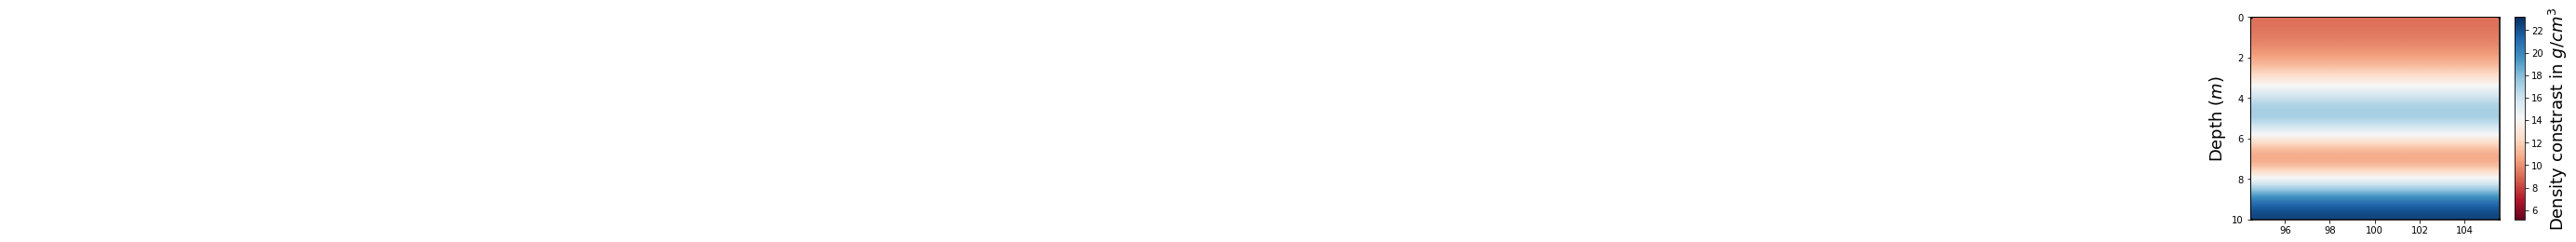

In [34]:
# fazendo um loop para varios prismas:
for i in range(nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'k.-')
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    cden = np.zeros( len(xp) )
    for j in range( len(xp) ):
        cden[j] = random.uniform(0.0, 30.0)
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')

#######################################################
    plt.gca().add_patch(patch)
#plt.plot(x,z,'k-o')

# plot the last and the first corner to close up the polygon:
    fs = 18 # font size for the label
    #plt.gca().invert_yaxis()
#plt.xlabel(r'UTM x $(m)$',fontsize=fs)
    plt.ylabel(r'Depth $(m)$',fontsize=fs)
#plt.xlim([np.min(x), np.max(x)])

##################################################################
# plot the density variation together with the basin:
##################################################################
    im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu',interpolation="bicubic", 
                    vmin=min(cden), vmax=max(cden),
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

    #im.set_clip_path(patch)

# OBS:::::: para reverter a escala de cores, basta um simples "_r" ! sucesso de vida!!!!
    plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'Density constrast in $g/cm^3$', fontsize=fs)

# Mat, verificar!!!!!!
#plt.savefig(caminho +".png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
#x = [0.0, 10.0, 10.0, 0.0, 0.0 ]
#z = [0.0, 0.0, 10.0, 10.0, 0.0 ]
#rhoz = np.ones( len(x) )*2.6

In [ ]:
### TEST FOR PAINTING ONE RECTANGLE:
# and the modeled basin:
fig = plt.figure(figsize=(14,8))
path = Path(np.array([x,z]).T)
patch = PathPatch(path, facecolor='none')

#######################################################
plt.gca().add_patch(patch)
#plt.plot(x,z,'k-o')

# plot the last and the first corner to close up the polygon:
fs = 18 # font size for the label
plt.gca().invert_yaxis()
#plt.xlabel(r'UTM x $(m)$',fontsize=fs)
plt.ylabel(r'Depth $(m)$',fontsize=fs)
#plt.xlim([np.min(x), np.max(x)])

##################################################################
# plot the density variation together with the basin:
##################################################################

im = plt.imshow(rhoz.reshape(np.size(z),1), cmap='Rd',interpolation="bicubic", vmin=0.0, vmax=10.0,
                origin='lower',extent=[min(x), max(x), min(z), max(z)],
                aspect="auto", clip_path=patch, clip_on=True)
#im.set_clip_path(patch)

# OBS:::::: para reverter a escala de cores, basta um simples "_r" ! sucesso de vida!!!!
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'Density constrast in $g/cm^3$', fontsize=fs)

# Mat, verificar!!!!!!
#plt.savefig(caminho +".png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()

